In [90]:
import numpy as np
import pandas as pd
import seaborn as sns

In [91]:
df = pd.read_csv("/home/dev/Documents/Datasets/House_Price.csv", header=0)

In [92]:
df

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,YES,0.060694


In [93]:
df["avg_dist"] = (df.dist1 + df.dist2 + df.dist3 + df.dist4)/4

In [94]:
del df['dist1']
del df['dist2']
del df['dist3']
del df['dist4']

In [95]:
df = pd.get_dummies(df)

In [96]:
del df["airport_NO"]
del df["waterbody_None"]
del df['parks']
df


,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
0,24.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,4.0875,1,0,0,1,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,4.9675,0,1,0,0,1
2,34.7,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,7.394,101.1200,38,4.9675,0,0,0,0,1
3,33.4,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,6.0650,1,1,0,0,1
4,36.2,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,6.0625,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.1792,27,2.4775,0,0,1,0,1
502,20.6,0.04527,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.1648,20,2.2875,1,0,1,0,1
503,23.9,0.06076,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.1912,31,2.1675,0,0,0,0,1
504,22.0,0.10959,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.1760,47,2.3900,1,0,0,0,1


In [97]:
#filling missing values with mean
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [11]:
df = df.fillna(df.mean()) #for all column simuntaneously but not preferred

In [12]:
df.crime_rate = np.log(1+df.crime_rate)

In [13]:
import statsmodels.api as sn

In [14]:
X_multi = df.drop("price", axis = 1)

In [15]:
X_multi

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,4.0875,1,0,0,1,1
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,4.9675,0,1,0,0,1
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,101.1200,38,4.9675,0,0,0,0,1
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,6.0650,1,1,0,0,1
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,6.0625,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.060747,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.1792,27,2.4775,0,0,1,0,1
502,0.044275,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.1648,20,2.2875,1,0,1,0,1
503,0.058986,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.1912,31,2.1675,0,0,0,0,1
504,0.103991,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.1760,47,2.3900,1,0,0,0,1


In [16]:
y_multi = df['price']

In [17]:
y_multi.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [18]:
X_multi_con = sn.add_constant(X_multi)

In [19]:
X_multi_con

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,4.0875,1,0,0,1,1
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,4.9675,0,1,0,0,1
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,101.1200,38,4.9675,0,0,0,0,1
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,6.0650,1,1,0,0,1
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,6.0625,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.060747,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.1792,27,2.4775,0,0,1,0,1
502,0.044275,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.1648,20,2.2875,1,0,1,0,1
503,0.058986,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.1912,31,2.1675,0,0,0,0,1
504,0.103991,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.1760,47,2.3900,1,0,0,0,1


In [20]:
lm_multi = sn.OLS(y_multi, X_multi_con).fit()

In [21]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     84.21
Date:                Sat, 24 Apr 2021   Prob (F-statistic):          5.57e-125
Time:                        11:46:45   Log-Likelihood:                -1516.9
No. Observations:                 506   AIC:                             3066.
Df Residuals:                     490   BIC:                             3133.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
crime_rate                   0.0240      0.348      0.069      0.945      -0.660       0.708
resid_area                  -0.0432      0.058     -0.750      0.453      -0.156       0.070
air_qual                   -15.8983      4.007     -3.968      0.000     -23.770      -8.026
room_num                     4.0159      0.427      9.403      0.000       3.177       4.855
age                         -0.0058      0.014     -0.428      0.669      -0.033       0.021
teachers                     1.0054      0.122      8.231      0.000       0.765       1.245
poor_prop                   -0.5774      0.053    -10.950      0.000      -0.681      -0.474
n_hos_beds                   0.3288      0.152      2.158      0.031       0.029       0.628
n_hot_rooms                  0.0349      0.042      0.828      0.408      -0.048       0.118
rainfall                     0.0163      0.018      0.913      0.362      -0.019       0.051
avg_dist                    -1.2221      0.189     -6.466      0.000      -1.593      -0.851
airport_YES                  1.1307      0.455      2.485      0.013       0.237       2.025
waterbody_Lake               0.2713      0.642      0.422      0.673      -0.991       1.533
waterbody_Lake and River    -0.6746      0.715     -0.944      0.346      -2.079       0.730
waterbody_River             -0.2979      0.547     -0.545      0.586      -1.373       0.777
bus_ter_YES                 -5.6159      5.155     -1.089      0.277     -15.745       4.513
==============================================================================
Omnibus:                      182.686   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              829.399
Skew:                           1.553   Prob(JB):                    7.91e-181
Kurtosis:                       8.449   Cond. No.                     2.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:

from sklearn.linear_model import LinearRegression
lm3 = LinearRegression()

In [23]:
lm3.fit(X_multi, y_multi)

LinearRegression()

In [24]:
print(lm3.intercept_,lm3.coef_)

-5.615935199100157 [ 2.40406362e-02 -4.31819800e-02 -1.58982685e+01  4.01594896e+00
 -5.82746125e-03  1.00543069e+00 -5.77369302e-01  3.28764349e-01
  3.48883856e-02  1.62803208e-02 -1.22208700e+00  1.13072912e+00
  2.71251320e-01 -6.74610676e-01 -2.97936113e-01  0.00000000e+00]


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.2, random_state = 0)

In [27]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 16) (102, 16) (404,) (102,)


In [28]:
lm_a = LinearRegression()

In [29]:
lm_a.fit(X_train, y_train)

LinearRegression()

In [30]:
y_test_a = lm_a.predict(X_test)

In [31]:
y_train_a = lm_a.predict(X_train)

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(y_train, y_train_a)

0.7562378935251564

In [34]:
r2_score(y_test,y_test_a)

0.5489591067856259

In [35]:
from sklearn import preprocessing

In [37]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [38]:
X_train_s = scaler.transform(X_train)

In [39]:
X_train_s

array([[-0.48535278, -0.70492455, -0.42487874, ..., -0.40529635,
         1.3293319 ,  0.        ],
       [-0.6444519 , -0.04487755, -1.24185891, ...,  2.4673304 ,
        -0.75225758,  0.        ],
       [-0.68457616, -0.88675963, -1.11148974, ..., -0.40529635,
        -0.75225758,  0.        ],
       ...,
       [-0.65120433, -0.15941933, -0.0772276 , ...,  2.4673304 ,
        -0.75225758,  0.        ],
       [-0.58524407, -0.60326872, -0.93766417, ..., -0.40529635,
         1.3293319 ,  0.        ],
       [-0.66156861, -1.01275558, -0.3988049 , ..., -0.40529635,
         1.3293319 ,  0.        ]])

In [40]:
X_test_s = scaler.transform(X_test)

In [41]:
X_test_s

array([[-0.72691842, -1.12872913, -0.83336883, ..., -0.40529635,
        -0.75225758,  0.        ],
       [ 1.53882839,  0.9988844 ,  0.65283979, ..., -0.40529635,
        -0.75225758,  0.        ],
       [-0.68371221,  0.39610829, -0.05115377, ..., -0.40529635,
        -0.75225758,  0.        ],
       ...,
       [-0.65265099, -0.85812418, -0.89420778, ..., -0.40529635,
         1.3293319 ,  0.        ],
       [-0.66035508, -0.07637654, -0.58132175, ..., -0.40529635,
        -0.75225758,  0.        ],
       [-0.6714012 , -0.36702631, -0.31189212, ...,  2.4673304 ,
        -0.75225758,  0.        ]])

# Ridge Regression

In [45]:
from sklearn.linear_model import Ridge

In [46]:
lm_r = Ridge(alpha = 0.5)
lm_r.fit(X_train_s,y_train)

Ridge(alpha=0.5)

In [48]:
r2_score(y_test, lm_r.predict(X_test_s))

0.5487448680313517

In [50]:
from sklearn.model_selection import validation_curve

In [51]:
validation_curve?

In [52]:
param_range = np.logspace(-2,8,100)

In [53]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [54]:
train_scores, test_scores= validation_curve(Ridge(), X_train_s,y_train, "alpha", param_range=param_range,scoring='r2') 

/home/dev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass param_name=alpha as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [57]:
print(train_scores)


[[7.49137532e-01 7.62394762e-01 7.52389108e-01 7.82281875e-01
  7.44780985e-01]
 [7.49137531e-01 7.62394762e-01 7.52389107e-01 7.82281875e-01
  7.44780985e-01]
 [7.49137530e-01 7.62394761e-01 7.52389106e-01 7.82281874e-01
  7.44780984e-01]
 [7.49137529e-01 7.62394760e-01 7.52389105e-01 7.82281873e-01
  7.44780983e-01]
 [7.49137526e-01 7.62394758e-01 7.52389103e-01 7.82281871e-01
  7.44780981e-01]
 [7.49137522e-01 7.62394755e-01 7.52389100e-01 7.82281869e-01
  7.44780978e-01]
 [7.49137516e-01 7.62394749e-01 7.52389096e-01 7.82281865e-01
  7.44780972e-01]
 [7.49137506e-01 7.62394741e-01 7.52389088e-01 7.82281858e-01
  7.44780964e-01]
 [7.49137491e-01 7.62394728e-01 7.52389076e-01 7.82281848e-01
  7.44780951e-01]
 [7.49137466e-01 7.62394708e-01 7.52389057e-01 7.82281831e-01
  7.44780930e-01]
 [7.49137426e-01 7.62394675e-01 7.52389026e-01 7.82281805e-01
  7.44780897e-01]
 [7.49137363e-01 7.62394623e-01 7.52388978e-01 7.82281763e-01
  7.44780844e-01]
 [7.49137263e-01 7.62394541e-01 7.523889

In [58]:
print(test_scores)

[[ 7.70823140e-01  7.08746372e-01  7.65274486e-01  6.59001455e-01
   7.88255278e-01]
 [ 7.70826001e-01  7.08747549e-01  7.65274281e-01  6.59000322e-01
   7.88255011e-01]
 [ 7.70829610e-01  7.08749035e-01  7.65274022e-01  6.58998894e-01
   7.88254675e-01]
 [ 7.70834163e-01  7.08750910e-01  7.65273696e-01  6.58997091e-01
   7.88254250e-01]
 [ 7.70839907e-01  7.08753274e-01  7.65273284e-01  6.58994816e-01
   7.88253713e-01]
 [ 7.70847153e-01  7.08756257e-01  7.65272763e-01  6.58991946e-01
   7.88253035e-01]
 [ 7.70856292e-01  7.08760018e-01  7.65272105e-01  6.58988324e-01
   7.88252179e-01]
 [ 7.70867820e-01  7.08764762e-01  7.65271274e-01  6.58983754e-01
   7.88251096e-01]
 [ 7.70882356e-01  7.08770742e-01  7.65270223e-01  6.58977988e-01
   7.88249726e-01]
 [ 7.70900686e-01  7.08778281e-01  7.65268893e-01  6.58970713e-01
   7.88247994e-01]
 [ 7.70923792e-01  7.08787782e-01  7.65267211e-01  6.58961534e-01
   7.88245800e-01]
 [ 7.70952913e-01  7.08799751e-01  7.65265079e-01  6.58949953e-01

In [59]:
train_mean = np.mean(train_scores,axis=1)

In [60]:
train_mean

array([7.58196852e-01, 7.58196852e-01, 7.58196851e-01, 7.58196850e-01,
       7.58196848e-01, 7.58196845e-01, 7.58196840e-01, 7.58196832e-01,
       7.58196819e-01, 7.58196798e-01, 7.58196766e-01, 7.58196714e-01,
       7.58196632e-01, 7.58196502e-01, 7.58196294e-01, 7.58195965e-01,
       7.58195442e-01, 7.58194613e-01, 7.58193300e-01, 7.58191223e-01,
       7.58187943e-01, 7.58182774e-01, 7.58174647e-01, 7.58161914e-01,
       7.58142039e-01, 7.58111164e-01, 7.58063478e-01, 7.57990334e-01,
       7.57879055e-01, 7.57711360e-01, 7.57461378e-01, 7.57093218e-01,
       7.56558089e-01, 7.55790929e-01, 7.54706383e-01, 7.53193867e-01,
       7.51111290e-01, 7.48277264e-01, 7.44462222e-01, 7.39380146e-01,
       7.32684164e-01, 7.23970447e-01, 7.12794646e-01, 6.98702712e-01,
       6.81273381e-01, 6.60164616e-01, 6.35154025e-01, 6.06166427e-01,
       5.73289415e-01, 5.36784777e-01, 4.97103000e-01, 4.54898153e-01,
       4.11027863e-01, 3.66518997e-01, 3.22490071e-01, 2.80041172e-01,
      

In [62]:
test_mean = np.mean(test_scores,axis=1)

In [63]:
test_mean

array([ 0.73842015,  0.73842063,  0.73842125,  0.73842202,  0.738423  ,
        0.73842423,  0.73842578,  0.73842774,  0.73843021,  0.73843331,
        0.73843722,  0.73844214,  0.73844833,  0.73845609,  0.73846583,
        0.73847803,  0.73849328,  0.73851228,  0.73853589,  0.73856509,
        0.73860103,  0.73864495,  0.73869813,  0.73876178,  0.73883678,
        0.73892327,  0.7390201 ,  0.73912389,  0.73922774,  0.73931948,
        0.73937928,  0.73937681,  0.73926754,  0.73898856,  0.7384534 ,
        0.73754602,  0.73611346,  0.73395739,  0.73082534,  0.72640366,
        0.72031559,  0.71212883,  0.70137602,  0.687589  ,  0.67034292,
        0.64930168,  0.62425499,  0.59514131,  0.56205963,  0.52527932,
        0.48525585,  0.44264853,  0.39832344,  0.35332049,  0.3087753 ,
        0.26580691,  0.22539981,  0.18831108,  0.15502286,  0.12574293,
        0.1004423 ,  0.07891298,  0.06082999,  0.04580659,  0.03343758,
        0.02332943,  0.01511884,  0.00848231,  0.00313934, -0.00

In [64]:
max(test_mean)

0.7393792841203459

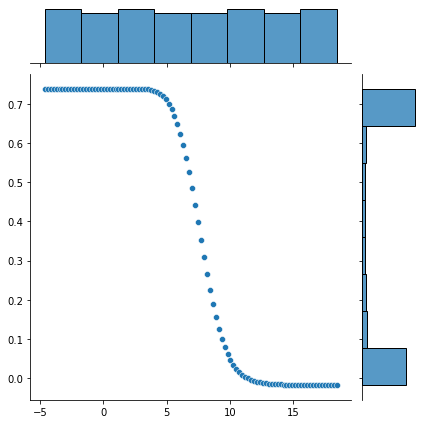

In [65]:
sns.jointplot(x=np.log(param_range), y=test_mean)

In [66]:
np.where(test_mean == max(test_mean))

(array([30]),)

In [67]:
param_range[30]

10.722672220103231

In [68]:
lm_r_best = Ridge(alpha=param_range[30])

In [70]:
lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=10.722672220103231)

In [71]:
r2_score(y_test, lm_r_best.predict(X_test_s))

0.5443910973808943

In [72]:
r2_score(y_train, lm_r_best.predict(X_train_s))

0.7557520746977725

# Lasso

In [73]:
from sklearn.linear_model import Lasso

In [74]:
lm_l = Lasso(alpha= 0.4)

In [75]:
lm_l.fit(X_train_s, y_train)

Lasso(alpha=0.4)

In [76]:
r2_score(y_test, lm_l.predict(X_test_s))

0.5150841547786357

In [77]:
train_score, test_score= validation_curve(Lasso(), X_train_s,y_train, "alpha", param_range=param_range,scoring='r2') 

/home/dev/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass param_name=alpha as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [78]:
print(train_score)

[[0.74911581 0.76237081 0.75236302 0.78225555 0.74475473]
 [0.7491034  0.76235646 0.7523474  0.78224122 0.74473908]
 [0.74908306 0.76233358 0.75232249 0.78221851 0.74471414]
 [0.74905099 0.7622971  0.75228276 0.78218231 0.7446744 ]
 [0.74899942 0.7622394  0.75221944 0.78212464 0.74461107]
 [0.74891727 0.76214683 0.75211852 0.78203276 0.74451093]
 [0.7487871  0.76200236 0.75195812 0.78188638 0.74436997]
 [0.74858543 0.76178893 0.75175279 0.78165549 0.74414546]
 [0.74826691 0.7614726  0.75145654 0.78130216 0.74380916]
 [0.74775967 0.76107851 0.75101952 0.78073942 0.74333663]
 [0.74695313 0.76045114 0.75032438 0.77984324 0.74258318]
 [0.74587129 0.75945179 0.74921746 0.77842131 0.74138346]
 [0.74422598 0.75786023 0.74745484 0.77653491 0.73947313]
 [0.74175112 0.75549874 0.74465102 0.77375462 0.73645749]
 [0.73806725 0.75189216 0.74057437 0.76993089 0.73224707]
 [0.73319621 0.74620475 0.73415641 0.76429163 0.72647622]
 [0.72604789 0.73827171 0.72484556 0.75546946 0.71808176]
 [0.71473501 0

In [79]:
print(test_score)

[[ 7.71435621e-01  7.08910081e-01  7.65376411e-01  6.58630681e-01
   7.88801522e-01]
 [ 7.71582511e-01  7.08937065e-01  7.65388994e-01  6.58565673e-01
   7.88933337e-01]
 [ 7.71803338e-01  7.08961094e-01  7.65398465e-01  6.58483536e-01
   7.89094032e-01]
 [ 7.72070702e-01  7.08974414e-01  7.65400210e-01  6.58373739e-01
   7.89287833e-01]
 [ 7.72401902e-01  7.08970728e-01  7.65386162e-01  6.58225416e-01
   7.89518094e-01]
 [ 7.72801429e-01  7.08914902e-01  7.65342563e-01  6.58022698e-01
   7.89785020e-01]
 [ 7.73273833e-01  7.08923869e-01  7.65235032e-01  6.57742144e-01
   7.90071832e-01]
 [ 7.73780466e-01  7.08749105e-01  7.65216839e-01  6.57332803e-01
   7.90383858e-01]
 [ 7.74325829e-01  7.08416606e-01  7.65034291e-01  6.56666394e-01
   7.90738780e-01]
 [ 7.74906777e-01  7.08440049e-01  7.64812454e-01  6.55724280e-01
   7.91207452e-01]
 [ 7.75471622e-01  7.08275865e-01  7.64393878e-01  6.54374363e-01
   7.91627056e-01]
 [ 7.75686993e-01  7.07757803e-01  7.63618836e-01  6.52417192e-01

In [80]:
train_mean_l = np.mean(train_score,axis=1)

In [81]:
train_mean_l

array([0.75817198, 0.75815751, 0.75813435, 0.75809751, 0.75803879,
       0.75794526, 0.75780079, 0.75758562, 0.75726148, 0.75678675,
       0.75603101, 0.75486906, 0.75310982, 0.7504226 , 0.74654235,
       0.74086505, 0.73254328, 0.72356288, 0.71808632, 0.71267483,
       0.7042898 , 0.69136462, 0.67187087, 0.64108869, 0.59207564,
       0.51403697, 0.40337129, 0.2510599 , 0.04054556, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [82]:
test_mean_l = np.mean(test_score,axis=1)

In [83]:
test_mean_l

array([ 0.73863086,  0.73868152,  0.73874809,  0.73882138,  0.73890046,
        0.73897332,  0.73904934,  0.73909261,  0.73903638,  0.7390182 ,
        0.73882856,  0.73827253,  0.73708992,  0.73516078,  0.73196899,
        0.72705927,  0.71999348,  0.71391206,  0.71046276,  0.70602079,
        0.69856441,  0.68655905,  0.66710709,  0.63563033,  0.58503696,
        0.50388353,  0.38925256,  0.23149872,  0.01957768, -0.0179741 ,
       -0.0179741 , -0.0179741 , -0.0179741 , -0.0179741 , -0.0179741 ,
       -0.0179741 , -0.0179741 , -0.0179741 , -0.0179741 , -0.0179741 ,
       -0.0179741 , -0.0179741 , -0.0179741 , -0.0179741 , -0.0179741 ,
       -0.0179741 , -0.0179741 , -0.0179741 , -0.0179741 , -0.0179741 ,
       -0.0179741 , -0.0179741 , -0.0179741 , -0.0179741 , -0.0179741 ,
       -0.0179741 , -0.0179741 , -0.0179741 , -0.0179741 , -0.0179741 ,
       -0.0179741 , -0.0179741 , -0.0179741 , -0.0179741 , -0.0179741 ,
       -0.0179741 , -0.0179741 , -0.0179741 , -0.0179741 , -0.01

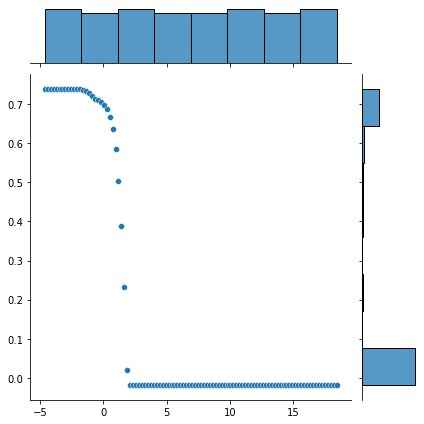

In [84]:
sns.jointplot(x=np.log(param_range), y=test_mean_l)

In [86]:
np.where(test_mean_l == max(test_mean_l))

(array([7]),)

In [87]:
param_range[7]

0.0509413801481638

In [89]:
lm_l_best = Lasso(alpha=param_range[7])

In [ ]:
lm_